<a href="https://colab.research.google.com/github/adammoss/MLiS2/blob/master/intro/backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let us again attempt to learn the XOR function using the same MLP network,  this time starting with random initial weights and using back-propogation with simple gradient descent.

The error functions for each neuron are
\begin{eqnarray}
\Delta_1^{(2)} &=& {\partial{J} \over \partial a_1^{(2)}}\,, \\
\Delta_1^{(1)} &=&  \Delta_1^{(2)} W_{11}^{(2)}   \Theta ( z_1^{(1)} )  \\
\Delta_2^{(1)} &=&  \Delta_1^{(2)} W_{21}^{(2)}  \Theta ( z_2^{(1)} )  \,,
\end{eqnarray}
since the Heavisde step function $\Theta$ is the derivative of the ReLU activation function.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [0]:
np.random.seed(0)

In [0]:
num_epochs = 10000
learning_rate = 0.01

In [1618]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
print(X)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [1619]:
Y = np.array([[0], [1], [1], [0]])
print(Y)

[[0]
 [1]
 [1]
 [0]]


Define the MLP class

In [0]:
class MLP(object):

  def __init__(self):
    # Initialise with random weights
    self.weights_1 = 0.1 * np.random.normal(size=(3,2))
    self.weights_2 = 0.1 * np.random.normal(size=(3,1))

  def forward(self, x):
    # Do a forward pass
    if len(x.shape) == 1:
      # Single example, so add a batch dimension of 1
      x = np.expand_dims(x, axis=0)
    # Hidden layer 
    z_1 = np.matmul(np.hstack((np.ones(shape=(x.shape[0], 1)), x)), self.weights_1)
    # Apply ReLU activation function
    a_1 = np.maximum(z_1, 0)
    # Output layer
    z_2 = np.matmul(np.hstack((np.ones(shape=(a_1.shape[0], 1)), a_1)), self.weights_2)
    a_2 = z_2
    return z_1, a_1, z_2, a_2

Pass the true solution through the network and check it gives zero loss

In [1621]:
m = MLP()
m.weights_1 = np.array([[0, -1], [1,1], [1,1]], dtype=np.float)
m.weights_2 = np.array([[0], [1], [-2]], dtype=np.float)
z_1, a_1, z_2, a_2 = m.forward(X)
print(0.25 * np.sum((a_2 - Y)**2))

0.0


Check visualising the loss function by taking a slice though w^2[0] and w^2[1] with all other weights  

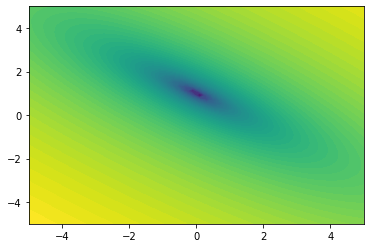

In [1622]:
m = MLP()
m.weights_1 = np.array([[0, -1], [1,1], [1,1]], dtype=np.float)
m.weights_2 = np.array([[0], [1], [-2]], dtype=np.float)
# Test plotting the loss versus weights
n = 50
test_weights = np.linspace(-5, 5, n)
loss = np.zeros((n, n))
for i in range(n):
  m.weights_2[0, 0] = test_weights[i]
  for j in range(n):
    m.weights_2[1, 0] = test_weights[j]
    z_1, a_1, z_2, a_2 = m.forward(X)
    loss[i, j] = 0.25 * np.sum((a_2 - Y)**2)
plt.figure()
plt.contourf(test_weights, test_weights, np.log(loss.T), levels=100)
plt.show()

Check optimising weights and biases connecting hidden and output layers only

In [1623]:
m = MLP()
m.weights_1 = np.array([[0, -1], [1,1], [1,1]], dtype=np.float)
weights_2_history = []
for epoch in range(num_epochs):
  # Do forward pass
  z_1, a_1, z_2, a_2 = m.forward(X)
  loss = 0.25 * np.sum((a_2 - Y)**2)
  if epoch % 100 == 0:
    print(epoch, loss)
  # Delta_2_1 has shape(4, 1), the first dimension being the batch dimension
  delta_2_1 = 0.5 * ( a_2 - Y)
  # Sum up over training examples
  m.weights_2[0, 0] -= learning_rate * np.sum(delta_2_1[:, 0])
  m.weights_2[1, 0] -= learning_rate * np.sum(delta_2_1[:, 0] * a_1[:, 0])
  m.weights_2[2, 0] -= learning_rate * np.sum(delta_2_1[:, 0] * a_1[:, 1])
  weights_2_history.append(np.copy(m.weights_2))
weights_2_history = np.array(weights_2_history)

0 0.4355446354933112
100 0.2081155930827479
200 0.16716858046849892
300 0.13740577761446743
400 0.11397501629094683
500 0.09487371257524689
600 0.07908063547359141
700 0.06595069965481909
800 0.05501164700785247
900 0.045890493714484074
1000 0.03828277002885988
1100 0.031936606567038076
1200 0.026642563563687136
1300 0.022226135174370176
1400 0.018541811372829054
1500 0.015468224542276907
1600 0.012904132562759817
1700 0.010765077946335168
1800 0.008980604014999406
1900 0.00749193357244775
2000 0.006250032700143078
2100 0.005213995613215177
2200 0.004349697284231518
2300 0.003628669425517311
2400 0.00302716279773092
2500 0.002525364955999316
2600 0.002106747666761571
2700 0.0017575225002118642
2800 0.0014661866665321857
2900 0.0012231441366231978
3000 0.001020389567785671
3100 0.0008512446234835096
3200 0.0007101380020790257
3300 0.0005924219291196016
3400 0.000494219068792677
3500 0.00041229481211353485
3600 0.00034395073527007707
3700 0.0002869357188521909
3800 0.00023937180040791938

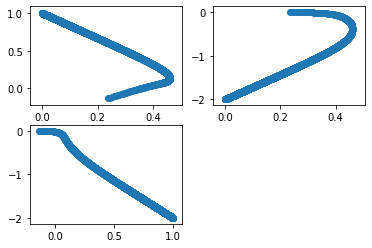

In [1624]:
plt.figure()
ax = plt.subplot(2, 2, 1)
ax.scatter(weights_2_history[:, 0, 0], weights_2_history[:, 1, 0])
ax = plt.subplot(2, 2, 2)
ax.scatter(weights_2_history[:, 0, 0], weights_2_history[:, 2, 0])
ax = plt.subplot(2, 2, 3)
ax.scatter(weights_2_history[:, 1, 0], weights_2_history[:, 2, 0])
plt.show()

In [1625]:
print(m.weights_1)

[[ 0. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [1626]:
print(m.weights_2)

[[ 7.64532192e-05]
 [ 9.99872493e-01]
 [-1.99978194e+00]]


In [1627]:
z_1, a_1, z_2, a_2 = m.forward(X)
print(a_2)

[[7.64532192e-05]
 [9.99948946e-01]
 [9.99948946e-01]
 [3.95041928e-05]]


In [1628]:
m = MLP()
weights_1_history = []
weights_2_history = []
for epoch in range(num_epochs):
  # Do forward pass
  z_1, a_1, z_2, a_2 = m.forward(X)
  loss = 0.25 * np.sum((a_2 - Y)**2)
  if epoch % 100 == 0:
    print(epoch, loss)
  # Delta's have shape(4, 1), the first dimension being the batch dimension
  delta_2_1 = 0.5 * ( a_2 - Y)
  g_prime = np.heaviside(z_1, 0)
  delta_1_1 = delta_2_1 * m.weights_2[1, 0] * g_prime[:, 0:1]
  delta_1_2 = delta_2_1 * m.weights_2[2, 0] * g_prime[:, 1:2]
  # Biases of layers connecting input and hidden layers
  m.weights_1[0, 0] -= learning_rate * np.sum(delta_1_1[:, 0])
  #print(delta_2_1, m.weights_2[2, 0], z_1[:, 1], np.heaviside(z_1[:, 1], 0), delta_1_2) 
  m.weights_1[0, 1] -= learning_rate * np.sum(delta_1_2[:, 0])
  # Weights of layers connecting input and hidden layers 
  m.weights_1[1, 0] -= learning_rate * np.sum(delta_1_1[:, 0] * X[:, 0])
  m.weights_1[2, 0] -= learning_rate * np.sum(delta_1_1[:, 0] * X[:, 1])
  m.weights_1[1, 1] -= learning_rate * np.sum(delta_1_2[:, 0] * X[:, 0])
  m.weights_1[2, 1] -= learning_rate * np.sum(delta_1_2[:, 0] * X[:, 1])
  # Biases of layers connecting hidden and output layers
  m.weights_2[0, 0] -= learning_rate * np.sum(delta_2_1[:, 0])
  # Weights of layers connecting hidden and output layers
  m.weights_2[1, 0] -= learning_rate * np.sum(delta_2_1[:, 0] * a_1[:, 0])
  m.weights_2[2, 0] -= learning_rate * np.sum(delta_2_1[:, 0] * a_1[:, 1])
  weights_1_history.append(np.copy(m.weights_1))
  weights_2_history.append(np.copy(m.weights_2))
weights_1_history = np.array(weights_1_history)
weights_2_history = np.array(weights_2_history)

0 0.7384189367424909
100 0.25757097510314464
200 0.25011836556059625
300 0.24995779349032357
400 0.24988725565558184
500 0.2498015057291625
600 0.24969224825568878
700 0.24954484578008768
800 0.24934181181021936
900 0.2490584967619614
1000 0.24865985454589537
1100 0.24810031181317244
1200 0.2473132177448137
1300 0.24620508163799099
1400 0.24466173877816452
1500 0.24271954161127648
1600 0.2404457699808692
1700 0.2376280159724097
1800 0.23409351628941258
1900 0.2297379213333516
2000 0.2247056348571527
2100 0.21870915046030198
2200 0.21222556604036064
2300 0.20520350243921723
2400 0.19797951865024144
2500 0.19119699026459852
2600 0.18469375476211164
2700 0.17903810872982515
2800 0.17390974893858405
2900 0.16936889884192838
3000 0.16535261220201003
3100 0.1611426443183637
3200 0.15641758462452876
3300 0.1507436447693162
3400 0.1439087341475015
3500 0.135448016090583
3600 0.12564448573561723
3700 0.11462011365493127
3800 0.10262447987155424
3900 0.09045093332022268
4000 0.07817649509368059


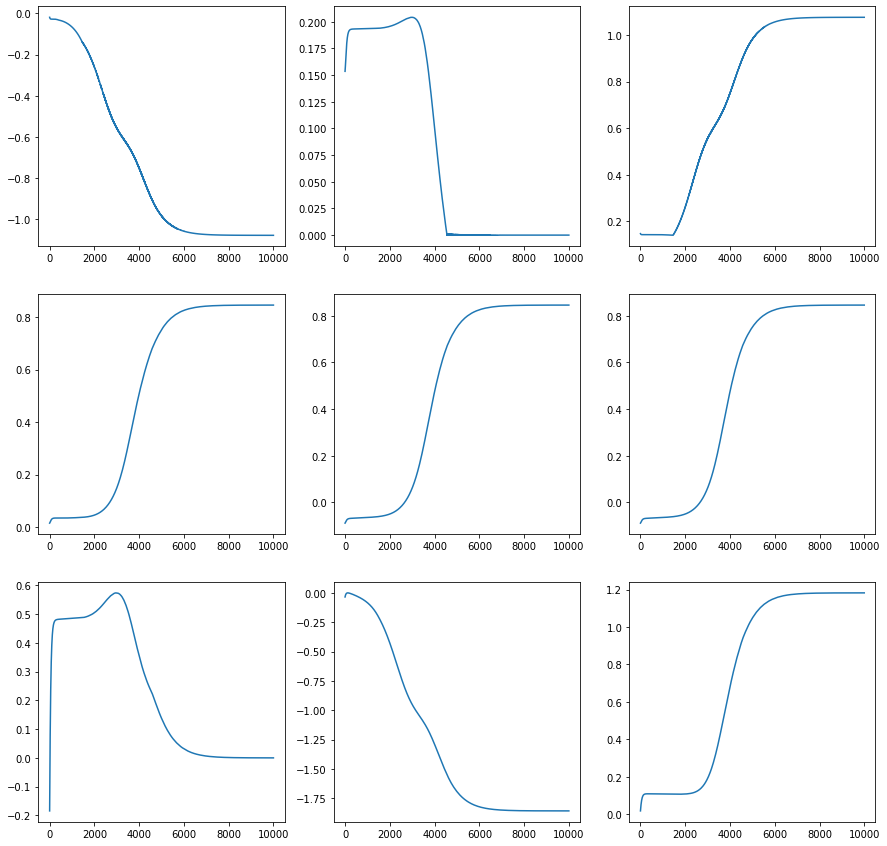

In [1629]:
plt.figure(figsize=(15, 15))
ax = plt.subplot(3, 3, 1)
ax.plot(weights_1_history[:,0,0])
ax = plt.subplot(3, 3, 2)
ax.plot(weights_1_history[:,0,1])
ax = plt.subplot(3, 3, 3)
ax.plot(weights_1_history[:,1,0])
ax = plt.subplot(3, 3, 4)
ax.plot(weights_1_history[:,1,1])
ax = plt.subplot(3, 3, 5)
ax.plot(weights_1_history[:,2,1])
ax = plt.subplot(3, 3, 6)
ax.plot(weights_1_history[:,2,1])
ax = plt.subplot(3, 3, 7)
ax.plot(weights_2_history[:,0,0])
ax = plt.subplot(3, 3, 8)
ax.plot(weights_2_history[:,1,0])
ax = plt.subplot(3, 3, 9)
ax.plot(weights_2_history[:,2,0])
plt.show()

In [1630]:
print(m.weights_1)

[[-1.07686001e+00  6.28768955e-08]
 [ 1.07686030e+00  8.45565951e-01]
 [ 1.07686030e+00  8.45565951e-01]]


In [1631]:
print(m.weights_2)

[[ 4.77625652e-05]
 [-1.85714807e+00]
 [ 1.18255507e+00]]


In [1632]:
z_1, a_1, z_2, a_2 = m.forward(X)
print(a_2)

[[4.78369206e-05]
 [9.99975598e-01]
 [9.99975599e-01]
 [1.48766588e-05]]
